In [1]:
import gmaps
import pandas as pd
import numpy as np
import requests
import os
import matplotlib.pyplot as plt
from config import gkey
from pprint import pprint

# Import API Key
gmaps.configure(api_key=gkey)

In [2]:
df = pd.read_csv("../exported_city_data.csv")
hm_locations = df[["Latitude", "Longitude"]]
hm_rating = df["Humidity"]
df

,Unnamed: 0,City Name,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,City ID,DateTime,Country
0,0,kindu,-3,26,82.74,30.0,100.0,2.62,212902,1627067080,CD
1,1,jertih,6,103,80.69,75.0,100.0,8.68,1736405,1627067080,MY
2,2,ajdabiya,30,19,77.95,75.0,0.0,16.46,2215210,1627067080,LY
3,4,liuzhou,25,109,81.27,76.0,100.0,4.29,1812356,1627067081,CN
4,5,falmouth,50,-5,66.00,74.0,100.0,26.22,7294436,1627067081,GB
...,...,...,...,...,...,...,...,...,...,...,...
758,930,bhairab bazar,24,91,82.45,92.0,100.0,9.17,1185263,1627067327,BD
759,931,zomin,40,68,86.70,18.0,0.0,5.35,1513886,1627067327,UZ
760,933,nanyuki,0,37,58.77,79.0,6.0,8.72,184433,1627067328,KE
761,934,djibo,14,-2,92.55,38.0,66.0,15.43,2597264,1627067328,BF


In [18]:
figure_layout= {
    'width':'900px',
    'height':'500px',
    'border':'3px solid black',
    'padding': '1px',
}
heat_layer = gmaps.heatmap_layer(hm_locations, weights=hm_rating, dissipating=False, max_intensity=100,
                                 point_radius=2.5)
fig = gmaps.figure(layout=figure_layout)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(border='3px solid black', height='500px', padding='1px', width='900px'))

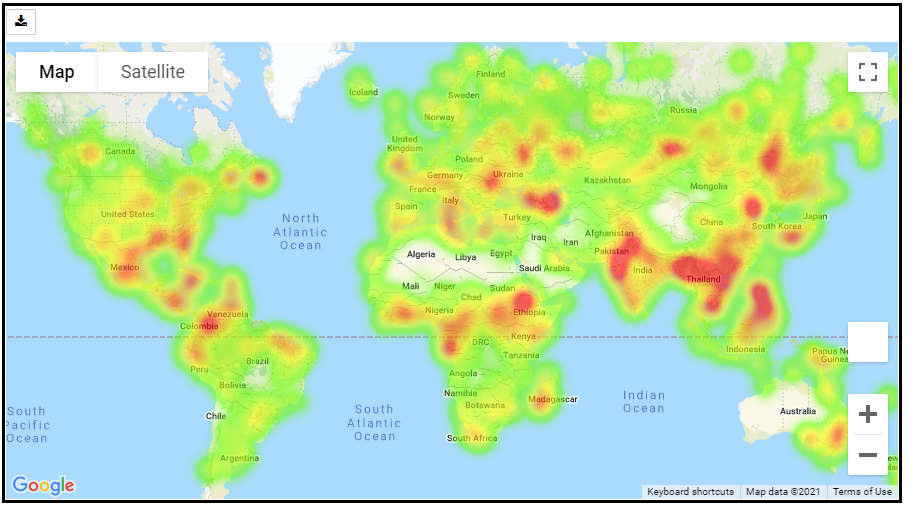

In [19]:
ideal_cities = (df.loc[(df['Cloudiness'] == 0) & (df['Wind Speed'] < 10) & (df['Temperature'] > 70) & (df['Temperature'] < 80)]).copy()

ideal_cities['Hotel Name'] = ""
ideal_cities['Hotel Latitude'] = 0.0
ideal_cities['Hotel Longitude'] = 0.0
ideal_cities

,Unnamed: 0,City Name,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,City ID,DateTime,Country,Hotel Name,Hotel Latitude,Hotel Longitude
14,19,stepnogorsk,52,72,70.65,39.0,0.0,5.23,1516527,1627067085,KZ,,0.0,0.0
15,21,khash,29,61,74.77,16.0,0.0,2.82,1159301,1627067085,IR,,0.0,0.0
27,36,erfurt,51,11,72.45,50.0,0.0,3.44,2920278,1627067089,DE,,0.0,0.0
50,66,zaysan,48,85,71.02,55.0,0.0,8.28,1517060,1627067097,KZ,,0.0,0.0
71,90,matagami,53,-77,76.32,32.0,0.0,8.93,5921589,1627067106,CA,,0.0,0.0
89,114,rathdrum,48,-117,77.61,27.0,0.0,7.38,5608388,1627067113,US,,0.0,0.0
188,236,altonia,-24,-54,77.52,49.0,0.0,9.93,3462999,1627067146,BR,,0.0,0.0
214,265,melilla,36,-3,77.45,79.0,0.0,5.68,2513947,1627067154,ES,,0.0,0.0
218,271,tuban,-7,112,71.42,79.0,0.0,5.17,6777308,1627067156,ID,,0.0,0.0
219,272,staryy saltiv,50,37,70.02,60.0,0.0,5.88,692703,1627067156,UA,,0.0,0.0


In [20]:
# Setting up the API call
url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
radius = 5000
for i, x in ideal_cities.iterrows():
    lat = x['Latitude']
    lon = x['Longitude']
    print(f"{lat},{lon}")
    params = {
        "type": "lodging",
        "key": gkey,
        "radius": radius,
        "location": f"{lat},{lon}"
    }
    response = requests.get(url, params=params).json()

    try:
        print(response['results'][0]['name'])
        ideal_cities['Hotel Name'].loc[ideal_cities['City Name'] == x['City Name']] = response['results'][0]['name']
        ideal_cities['Hotel Latitude'].loc[ideal_cities['City Name'] == x['City Name']] = response['results'][0]['geometry']['location']['lat']
        ideal_cities['Hotel Longitude'].loc[ideal_cities['City Name'] == x['City Name']] = response['results'][0]['geometry']['location']['lng']
    except IndexError:
        print(f"No Hotel Found for {x['City Name']}")
        

52,72
No Hotel Found for stepnogorsk
29,61
No Hotel Found for khash
51,11
Radisson Blu
48,85
No Hotel Found for zaysan
53,-77


C:\Users\joshu\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


No Hotel Found for matagami
48,-117
Stoneridge Resort
-24,-54
No Hotel Found for altonia
36,-3
No Hotel Found for melilla
-7,112
Dina Ulatun Nasikah
50,37
No Hotel Found for staryy saltiv
42,22
No Hotel Found for sveti nikole
-22,-43
Sítio Passatempo
49,-80
No Hotel Found for iroquois falls
-12,138
No Hotel Found for nhulunbuy
45,-121
No Hotel Found for redmond
-21,-46
Pousada Refúgio das Estrelas
-23,-45
Pousada Seriema
23,110
Wenzi Hostel
37,21
No Hotel Found for marathopolis
-29,-51
Mata Total
49,-79
No Hotel Found for macamic
39,17
Via Austria n`6A
-8,27
No Hotel Found for manono
51,-79
No Hotel Found for moose factory
-15,48
No Hotel Found for antsohihy
37,47
هتل.ایرج علیپور
-5,15
No Hotel Found for mbanza-ngungu
23,-111
No Hotel Found for todos santos


In [21]:
ideal_cities

,Unnamed: 0,City Name,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,City ID,DateTime,Country,Hotel Name,Hotel Latitude,Hotel Longitude
14,19,stepnogorsk,52,72,70.65,39.0,0.0,5.23,1516527,1627067085,KZ,,0.000000,0.000000
15,21,khash,29,61,74.77,16.0,0.0,2.82,1159301,1627067085,IR,,0.000000,0.000000
27,36,erfurt,51,11,72.45,50.0,0.0,3.44,2920278,1627067089,DE,Radisson Blu,50.978828,11.036656
50,66,zaysan,48,85,71.02,55.0,0.0,8.28,1517060,1627067097,KZ,,0.000000,0.000000
71,90,matagami,53,-77,76.32,32.0,0.0,8.93,5921589,1627067106,CA,,0.000000,0.000000
89,114,rathdrum,48,-117,77.61,27.0,0.0,7.38,5608388,1627067113,US,Stoneridge Resort,48.010752,-116.999089
188,236,altonia,-24,-54,77.52,49.0,0.0,9.93,3462999,1627067146,BR,,0.000000,0.000000
214,265,melilla,36,-3,77.45,79.0,0.0,5.68,2513947,1627067154,ES,,0.000000,0.000000
218,271,tuban,-7,112,71.42,79.0,0.0,5.17,6777308,1627067156,ID,Dina Ulatun Nasikah,-6.999448,111.989137
219,272,staryy saltiv,50,37,70.02,60.0,0.0,5.88,692703,1627067156,UA,,0.000000,0.000000


In [22]:
pprint(response['results'][0]['geometry']['location'])

IndexError: list index out of range

In [23]:
hotels = ideal_cities[["Hotel Name", 'Hotel Latitude', 'Hotel Longitude', 'City Name', 'Country']]
hotels.drop(hotels.loc[hotels['Hotel Name'] == ''].index, inplace=True)
hotels

C:\Users\joshu\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Hotel Name,Hotel Latitude,Hotel Longitude,City Name,Country
27,Radisson Blu,50.978828,11.036656,erfurt,DE
89,Stoneridge Resort,48.010752,-116.999089,rathdrum,US
218,Dina Ulatun Nasikah,-6.999448,111.989137,tuban,ID
235,Sítio Passatempo,-22.026640,-42.981558,sapucaia,BR
281,Pousada Refúgio das Estrelas,-21.018502,-46.003909,carmo do rio claro,BR
342,Pousada Seriema,-23.025400,-45.014058,cunha,BR
380,Wenzi Hostel,23.013562,110.005884,yulin,CN
438,Mata Total,-29.036689,-51.014994,sao marcos,BR
513,Via Austria n`6A,39.033037,16.991357,cutro,IT
715,هتل.ایرج علیپور,36.983591,47.013644,hashtrud,IR


In [24]:
# NOTE: Do not change any of the code in this cell

# Using the template add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City Name}</dd>
<dt>Country</dt><dd>{Country}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
hotel_info = [info_box_template.format(**row) for index, row in hotels.iterrows()]
locations = hotels[["Hotel Latitude", "Hotel Longitude"]]

In [25]:
# Add marker layer ontop of heat map
marker_layer = gmaps.marker_layer(locations, info_box_content = hotel_info)

fig = gmaps.figure()
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

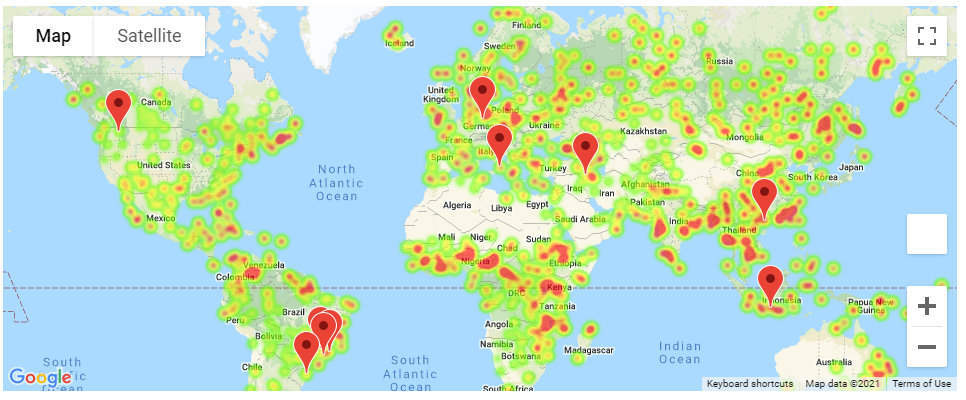